# I. Introduction to Scikit-learn

### Step 1. Import the necessary libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Step 2. Import one of the toy datasets (digits) from Scikitlearn
This is a copy of the test set of the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Each datapoint is a 8x8 image of a digit, Classes=10, Samples per class~180,

Samples total=1797, Dimensionality=64, and Features=(integers 0-16)


After importing this dataset, split it into test and train sets. You may check the shape of data and the target attributes of the dataset. You may also want to print a few samples from the dataset.

In [9]:
from sklearn.datasets import load_digits
df = load_digits()
X = df.data # How does it 'know' what the features and the target are? The data are pre-processed by sklearn, into 'Bunch' objects
y = df.target

# have a look at target and data atributes to see whether data is balanced etc
print(X.shape)
print(y.shape)
print(np.unique(y, return_counts=True)) #Note that .value_counts() doesn't work for a numpy array! need np.unique(y, return_counts = True)

print(df.DESCR)
print(df.feature_names)  # Feature names
print(df.target_names)  # Target label names

(1797, 64)
(1797,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are

In [10]:
# Split into test/train splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) # No need for startify = y because classes are roughly balanced (180 per class)

# Check the shape of train/test split to make sure all looks okay
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


# II. Sklearn API for model training
-------------------
### Step 1. Import your model class

As an example, let us `LinearSVC`, a linear support vector classifier. This classifier is imprted from `sklearn.svm` module which includes Support Vector Machine algorithms.

In [11]:
from sklearn.svm import LinearSVC

### Step2. Instantiate an object and set the parameters

In [12]:
model = LinearSVC() # Use default params for now


### Step 3. Fit the model
When fitting the model, use the train dataset.

In [13]:
model.fit(X_train, y_train)

LinearSVC()

### Step 4. Predict and Evaluate
Use the test set for this purpose, for now.

In [14]:
test_predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_predictions)) # Each row corresponds to TRUE LABELS (0-9), each column to PREDICTED LABELS. Where row index = column index it's a correct prediction

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.83      0.91      0.87        43
           2       0.95      0.91      0.93        44
           3       0.86      0.96      0.91        45
           4       0.97      0.97      0.97        38
           5       0.98      0.94      0.96        48
           6       0.96      0.98      0.97        52
           7       1.00      0.94      0.97        48
           8       0.87      0.85      0.86        48
           9       0.93      0.87      0.90        47

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  1  0  3  0]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  1 37  0  0  0  0  0]
 [ 0  2  0  0  0 45  1  0  0  0]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  1  0

### Step5. Try another Algorithm
Try `RandomForestCLassifier` this time, import it from `sklearn.ensemble` module.

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)
print(classification_report(y_test, test_predictions))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.93      0.98      0.95        43
           2       1.00      0.95      0.98        44
           3       0.98      0.98      0.98        45
           4       1.00      0.97      0.99        38
           5       0.94      0.98      0.96        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.90      0.93        48
           9       0.98      0.98      0.98        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 1  1 42  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0

# II. Cross-validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using  of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
(Check https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

### Step 1. Import libraries
Import the classes `cross_val_score` and `KNeighborsClassifier`

In [16]:
from sklearn.model_selection import cross_val_score #Cross validation score evaluates model performance using cross-validation (k fold - splitting the training data up even more), but does not grid search for hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier

### Step 2. Run cross validation
Run cross validation for `cv=5` on the train dataset. Print the scores.

In [17]:
# Create a model
model = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 means 5-fold cross-validation
print("Cross-validated scores:", scores)
print("Mean score:", scores.mean())

Cross-validated scores: [0.98518519 0.9962963  0.9739777  0.98513011 0.98513011]
Mean score: 0.985143879939419


### Step 3: Print the mean score and confidence interval
Print the mean score of cross validation with 95% confidence interval.

In [18]:
from scipy import stats
mean_score = scores.mean()
confidence_interval = stats.t.interval(0.95, len(scores)-1, loc=scores.mean(), scale=scores.std())
print("Mean score:", mean_score)
print("Confidence interval:", confidence_interval)

Mean score: 0.985143879939419
Confidence interval: (np.float64(0.9655483071539233), np.float64(1.0047394527249147))


### Step 4. Repeat Step 3 for  KFold, StratifiedKFold
Repeat Step 3 for `KFold`, `StratifiedKFold` with number of splits `n_splits=10`. Print the mean score with 95% confidence interval.

In [19]:
from sklearn.model_selection import KFold, StratifiedKFold
# Create a model
model = KNeighborsClassifier(n_neighbors=5)

# Set up StratifiedKFold cross-validation with 10 splits
skf = StratifiedKFold(n_splits=10) # no stratify = y param in cross_val_score function, need to use Startified KFold(n_splits=) instead and pass this into cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Calculate mean and standard error
mean_score = np.mean(scores)
std_error = stats.sem(scores)

# Compute the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(scores) - 1, loc=mean_score, scale=std_error)

# Print results
print("StratifiedKFold Cross-validation:")
print(f"Mean accuracy: {mean_score:.3f}")
print(f"95% confidence interval: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})")

StratifiedKFold Cross-validation:
Mean accuracy: 0.972
95% confidence interval: (0.958, 0.985)


Grid Searches
=================
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

See (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Step 1. Grid-Search with build-in cross validation
Import `GridSearchCV` from `sklearn.model_selection` and `SVC` from `sklearn.svm`

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Step 2: Define parameter grid:
`SVC` has two parameters `C` and `gamma`. Do not worry about the roles of these two parameters on the algorithm. Set model parameters to `'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ])` and `gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])`. There are different ways of assigning parameter values, your instructor will lead you.

In [21]:
model = SVC()
param_grid = {'C':np.array([ 0.001, 0.01 , 0.1 , 1. , 10. , 100. ]), 'gamma':np.array([0.00001, 0.0001 , 0.001 , 0.01 , 0.1 ])}

### Step 3. Instintiate the grid search object
Instintiate a grid search object for `SVC`, for the corresponding paranmeters with 5-folds cross validation.

In [22]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv= 5, scoring = 'accuracy')

### Step 4. Fit the grid search object on the train data set
A GridSearchCV object behaves just like a normal classifier.

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])},
             scoring='accuracy')

### Step 5. Grid Search Results
- Form a data frame from the grid search results.
- Print the first 10 predictions of `X_test` using the grid search model.
- Print the best parameter, best score and estimator of the grid search.
- Create a heat map for the grid search parameters using the parameter values and the grid search results.


In [24]:
df = pd.DataFrame(grid_search.cv_results_)
print(grid_search.predict(X_test[:10]))

# print the best parameter, best score, and estimator of the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
print("Best parameters:", best_params)
print("Best score:", best_score)
print("Best estimator:", best_estimator)


[2 8 2 6 6 7 1 9 8 5]
Best parameters: {'C': np.float64(10.0), 'gamma': np.float64(0.001)}
Best score: 0.9918353297535452
Best estimator: SVC(C=np.float64(10.0), gamma=np.float64(0.001))


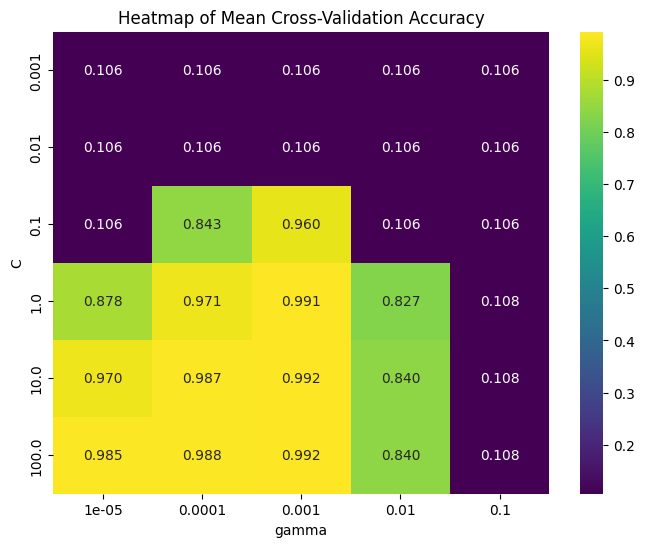

In [25]:
# Extract the grid search results
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')
plt.title('Heatmap of Mean Cross-Validation Accuracy')
plt.xlabel('gamma')
plt.ylabel('C')
plt.show()